In [1]:
"""Errors might remain if Kernel is not restarted"""
"""Changes to local modules might not update if Kernel is not restarted"""

'Changes to local modules might not update if Kernel is not restarted'

In [2]:
"""Parameterization"""
import numpy as np
t = np.arange(1, 150+1, 1) # array of timepoints at which to compute the antibody concentration
N = 3 # number of antibody classes
t_max = 14*np.ones(N) # time for the peak of antibody concentration for each antibody class
t_half = np.array([2, 3, 5])*69#*np.ones(N) # antibody half-life for all antibody classes, respecively
params_dic = {"t_max":t_max, "t_half":t_half}

In [3]:
"""Compute Antibody concentration"""
from Methods.PK import Antibody
is_log = False # if True, it returns the log of the antibody concentration
dataname = "Ab_%d"%N
solver = "lm" # root solver method for finding absorption rate ka (see scipy.optimize.root)
c_t, c_dframe, ka, ke = Antibody(t = t, params_dic = params_dic, is_log = is_log, save_to = "Data/"+dataname+".csv")
print(c_dframe, "k_a:", ka, "k_e:", ke)


 k_a was found correctly: True 

     Days      Ab_1      Ab_2      Ab_3
0       1  0.274356  0.295241  0.321746
1       2  0.476993  0.506174  0.542090
2       3  0.626305  0.656593  0.692787
3       4  0.735973  0.763581  0.795649
4       5  0.816168  0.839398  0.865658
..    ...       ...       ...       ...
145   146  0.524185  0.649302  0.771174
146   147  0.521559  0.647132  0.769626
147   148  0.518946  0.644968  0.768081
148   149  0.516346  0.642812  0.766540
149   150  0.513759  0.640663  0.765001

[150 rows x 4 columns] k_a: [0.29625323 0.33158956 0.37564891] k_e: [0.00502281 0.00334854 0.00200912]


(<Figure size 1400x700 with 1 Axes>,
 <AxesSubplot:xlabel='time (days)', ylabel='$c_t$ (normalized)'>)

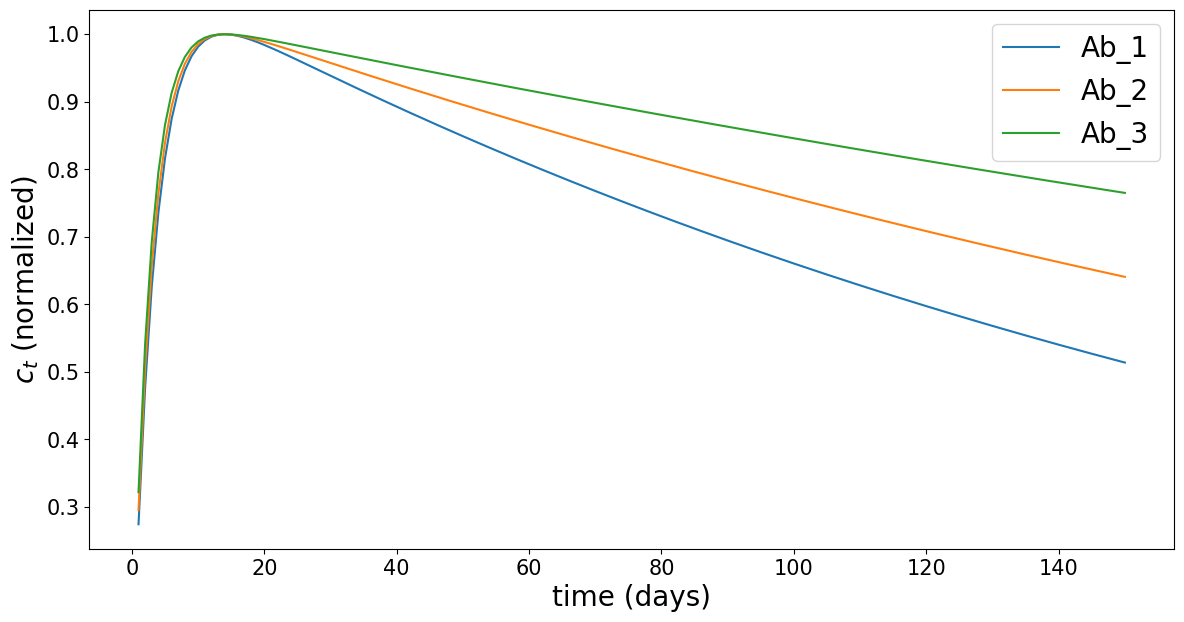

In [4]:
"""Plot Antibody concentration only if t is an array and save, default png but add extension .pdf to save as pdf"""
from Methods.figure_settings import Display
xysize = (15, 15) # size of xy ticks
labsize = 20 # size of labels and legends
figsize = (14, 7) # figure (width, height)
labels = c_dframe.columns[1:] # Antibody class labels by orders corresponding to the rows of c_t
xval = "time (days)" # name of variable on x axis
yval = "$c_t$ (normalized)" # name of variable on y axis
Display(t, c_t, is_log, labels, 
        figsize, xysize, labsize, 
        save_to = "Figures/"+dataname+".pdf",
        xval = xval, yval = yval)